# Importing Library


Penjelasan masing" lib dan digunakan untuk apa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
!wget --no-check-certificate \
  https://github.com/codernewbie04/AI_Tupro2/blob/main/bengkel.xlsx?raw=true \
  -O /content/bengkel.xlsx


--2022-04-22 17:19:04--  https://github.com/codernewbie04/AI_Tupro2/blob/main/bengkel.xlsx?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/codernewbie04/AI_Tupro2/raw/main/bengkel.xlsx [following]
--2022-04-22 17:19:04--  https://github.com/codernewbie04/AI_Tupro2/raw/main/bengkel.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codernewbie04/AI_Tupro2/main/bengkel.xlsx [following]
--2022-04-22 17:19:04--  https://raw.githubusercontent.com/codernewbie04/AI_Tupro2/main/bengkel.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
raw_data = pd.read_excel(r'bengkel.xlsx')

# Struktur data




In [ ]:
class bengkel:
  def __init__(self):
    self.id = -1
    self.servis = -1
    self.harga = -1

    #Fuzzifikasi (Fuzzy Input)
    self.servis_baik = -1
    self.servis_biasa = -1
    self.servis_buruk = -1

    self.harga_murah = -1 # Range [1, 4]
    self.harga_mahal = -1 # Range [7, 10]

    #Inferense 
    self.bagus = []                 # Masukkan Semua Nilai Yang Mungkin untuk Bagus
    self.buruk = []                 # Masukkan Semua Nilai Yang Mungkin untuk Buruk


    #Defuzzification
    self.rating = -1
  


    

# Pengkasifikasian Crisp input dan nilai μ untuk melakukan fuzifikasi

Kualitas service dibagi menjadi (Range 1-100):  
- Baik [90 - 100]
- Biasa [40 - 60]
- Buruk [1 - 20]

NB : Semakin tinggi semakin baik


Harga service dibagi menjadi (Range 1-10):
- Mahal [7 - 10]
- Murah [1 - 4]

NB : Semakin tinggi semakin mahal


Maka dapat kami gambarkan grafik fuzifikasi sebagai berikut

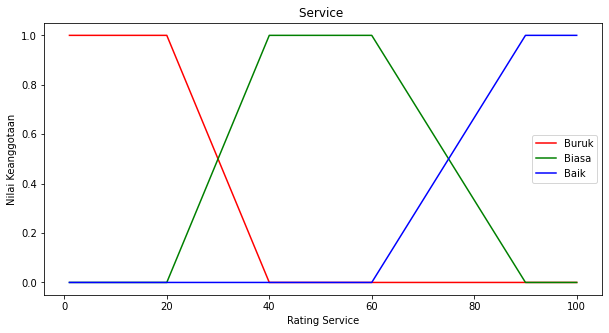

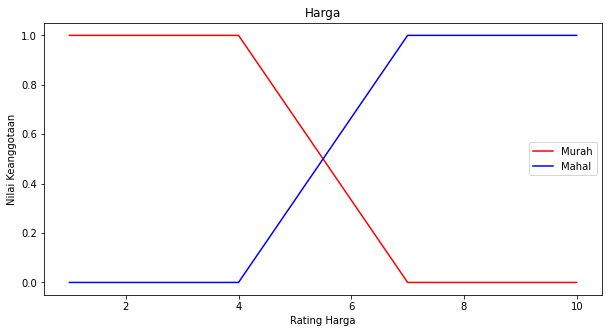

In [ ]:
def graf_service():
  x1 = [1,20,40,100] 
  y1 = [1,1,0,0] 
    
  x2 = [1,20,40,60,90,100] 
  y2 = [0,0,1,1,0,0]
    
  x3 = [1,60,90,100] 
  y3 = [0,0,1,1]
    
  plt.figure(figsize=(10,5))
  plt.plot(x1, y1,'r-',label = 'Buruk') 
  plt.plot(x2, y2,'g-',label = 'Biasa') 
  plt.plot(x3, y3,'b-',label = 'Baik')
  plt.xlabel('Rating Service')
  plt.ylabel('Nilai Keanggotaan')
  plt.title('Service ') 
  plt.legend()
  plt.show()

def graf_harga():
  x1 = [1,4,7,10] 
  y1 = [1,1,0,0] 
    
  x2 = [1,4,7,10] 
  y2 = [0,0,1,1] 
    
  fig = plt.figure(figsize=(10,5))
  plt.plot(x1, y1,'r-',label = 'Murah') 
  plt.plot(x2, y2,'b-',label = 'Mahal')
  plt.xlabel('Rating Harga')
  plt.ylabel('Nilai Keanggotaan')
  plt.title('Harga')
  plt.legend()
  plt.show()

graf_service()
print("")
graf_harga()

Dari grafik tersebut dapat kita gunakan rumus μ Servis sebagai berikut :

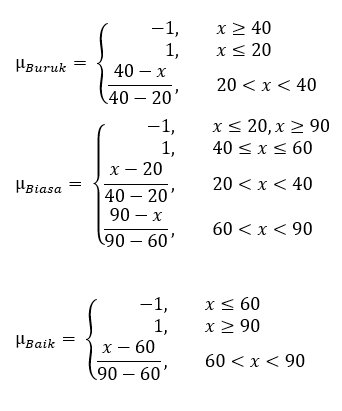

Dan μ Harga sebagai Berikut : 

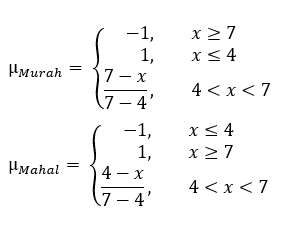



In [ ]:
def fuzzification(data_bengkel):
  for i in range(len(data_bengkel)):
    #Fuzzification terhadap data bengkel bagian servis
    if data_bengkel[i].servis >= 1 and data_bengkel[i].servis <= 20:
      data_bengkel[i].servis_buruk = 1
    elif data_bengkel[i].servis > 20 and data_bengkel[i].servis < 40:
      data_bengkel[i].servis_buruk = (40 -data_bengkel[i].servis)/(40 - 20)
      data_bengkel[i].servis_biasa = (data_bengkel[i].servis - 20)/(40 - 20)
    elif data_bengkel[i].servis >= 40 and data_bengkel[i].servis <= 60:
      data_bengkel[i].servis_biasa = 1
    elif data_bengkel[i].servis > 60 and data_bengkel[i].servis < 90:
      data_bengkel[i].servis_biasa = (90 - data_bengkel[i].servis)/(90 - 60)
      data_bengkel[i].servis_baik = (data_bengkel[i].servis - 60)/(90 - 60)
    elif data_bengkel[i].servis >= 90 and data_bengkel[i].servis <= 100:
      data_bengkel[i].servis_baik = 1

    #Fuzzification terhadap data bengkel bagian harga
    if data_bengkel[i].harga >= 1 and data_bengkel[i].harga <= 4:
        data_bengkel[i].harga_murah = 1
    elif data_bengkel[i].harga > 4 and data_bengkel[i].harga < 7:
        data_bengkel[i].harga_murah = (7 - data_bengkel[i].harga)/(7 - 4)
        data_bengkel[i].harga_mahal = (data_bengkel[i].harga - 4)/(7 - 4)
    elif data_bengkel[i].harga >= 7 and data_bengkel[i].harga <= 10:
        data_bengkel[i].harga_mahal = 1
  
  return data_bengkel

# Inference

Untuk dapat menghasilkan fuzzy output, kita perlu melakukan inference terlebih dahulu berdasarkan aturan yang tersedia. Aturan aturan tersebut adalah sebagai berikut : 

| Harga \ Service |  Buruk |  Biasa |  Baik  |
|-----------------|--------|--------|--------|
| Mahal           | Buruk  | Buruk  | Buruk  |
| Murah           | Buruk  | Bagus  | Bagus  |

In [ ]:
def inference(data_bengkel):
  for i in range(len(data_bengkel)):
    #Aturan untuk harga mahal
    if data_bengkel[i].harga_mahal != -1:
      if data_bengkel[i].servis_buruk != -1:
        data_bengkel[i].buruk.append(min(data_bengkel[i].harga_mahal,data_bengkel[i].servis_buruk))
      if data_bengkel[i].servis_biasa != -1: 
        data_bengkel[i].buruk.append(min(data_bengkel[i].harga_mahal,data_bengkel[i].servis_biasa))
      if data_bengkel[i].servis_baik != -1: 
        data_bengkel[i].buruk.append(min(data_bengkel[i].harga_mahal,data_bengkel[i].servis_baik))

    #Aturan untuk harga murah
    if data_bengkel[i].harga_murah != -1:
      if data_bengkel[i].servis_buruk != -1:
        data_bengkel[i].buruk.append(min(data_bengkel[i].harga_murah,data_bengkel[i].servis_buruk))
      if data_bengkel[i].servis_biasa != -1: 
        data_bengkel[i].buruk.append(min(data_bengkel[i].harga_murah,data_bengkel[i].servis_biasa))
      if data_bengkel[i].servis_baik != -1: 
        data_bengkel[i].bagus.append(min(data_bengkel[i].harga_murah,data_bengkel[i].servis_baik))

  return data_bengkel


# Defuzzification
Berdasrkan nilai yang didapat dari nilai inferensi sebelumnya, kita harus melakukan defuzzifikasi sehingga mendaptkan nilai yang diinginkan.  
Dengan berdasarkan μ output, kita mendapatkan nilai bilangan real dari 1 hingga 100.  

Penilaian Bengkel :
- Bagus
- Buruk

Dengan gambar fungsi keanggotaan seperit berikut:









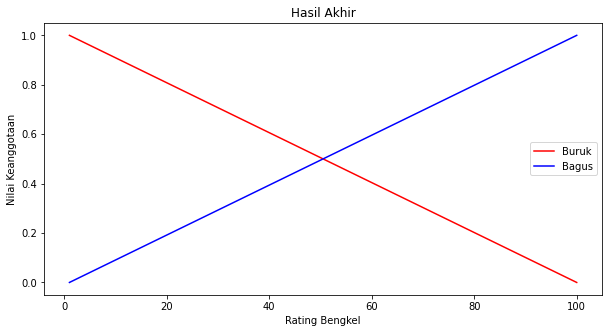

In [ ]:
def graf_defuzzification():
  x1 = [1,100] 
  y1 = [1,0] 
    
  x2 = [1,100] 
  y2 = [0,1] 
    
  plt.figure(figsize=(10,5))
  plt.plot(x1, y1,'r-',label = 'Buruk') 
  plt.plot(x2, y2,'b-',label = 'Bagus')
  plt.xlabel('Rating Bengkel')
  plt.ylabel('Nilai Keanggotaan')
  plt.title('Hasil Akhir') 
  plt.legend()
  plt.show()

graf_defuzzification()

In [ ]:
def defuzzification(data_bengkel):
  #Menggunakan metode Tsukamoto
  param_buruk = {
      "batas_atas":100,
      "batas_bawah":1
  }

  param_bagus = {
      "batas_atas":100,
      "batas_bawah":1
  }
  for i in range(len(data_bengkel)):
    miu_buruk = 0
    miu_bagus = 0
    if len(data_bengkel[i].buruk) > 0:
      miu_buruk = max(data_bengkel[i].buruk)
    if len(data_bengkel[i].bagus) > 0:
      miu_bagus = max(data_bengkel[i].bagus)

    if miu_buruk == 1 or miu_bagus == 1:
      if miu_buruk == 1:
        data_bengkel[i].rating = param_buruk["batas_bawah"]
      elif miu_bagus == 1:
        data_bengkel[i].rating = param_bagus["batas_atas"]
      else:
        data_bengkel[i].rating = -1
    else :
      x1 = param_buruk["batas_atas"] - (miu_buruk * (param_buruk["batas_atas"] - param_buruk["batas_bawah"]))
      x2 = (miu_bagus * (param_bagus["batas_atas"] - param_bagus["batas_bawah"])) - param_bagus["batas_bawah"]
      rating = ((miu_bagus * x2) + (miu_buruk * x1)) / (miu_buruk + miu_bagus)
      data_bengkel[i].rating = rating


  return data_bengkel



# Ranking 
Melakukan sorting secara descending berdasarkan rating dari masing masing bengkel

In [ ]:
def sorting(data_bengkel):
  data_bengkel = sorted(data_bengkel, key=lambda x: x.rating, reverse= 1)
  return data_bengkel

# Fungsi utama / Main

Berikut adalah proses atau bagian semua fungsi dipanggil / dijalankan dengan alur 

Download datasets -> Fuzzification -> Inference -> Defuzzification 

In [ ]:
data_bengkel = []

for i in range(len(raw_data)):
  bengkel_tmp = bengkel()
  bengkel_tmp.id = raw_data.id[i]
  bengkel_tmp.servis = raw_data.servis[i]
  bengkel_tmp.harga = raw_data.harga[i]
  data_bengkel.append(bengkel_tmp)

# Contoh manggil id data ke-i(0) 
#print(data_bengkel[0].id)

# Contoh manggil harga data ke-i(0) 
#print(data_bengkel[0].harga)


# Contoh manggil servis data ke-i(0) 
#print(data_bengkel[0].servis)


# Melakukan Fuzzification 
data_bengkel = fuzzification(data_bengkel)

# Melakukan Inference
data_bengkel = inference(data_bengkel)

# Melakukan Defuzzification
data_bengkel = defuzzification(data_bengkel)

# Melakukan rangking
data_bengkel = sorting(data_bengkel)



In [ ]:
#testing output (takutnya ada logic error)

#Test fuzzfication menamilkan 10 data
for i in data_bengkel[:10]:
  print("Harga (Murah, Mahal, Rate Harga):", i.harga_murah, i.harga_mahal, i.harga)
  print("Servis (Baik, Biasa, Buruk, Rate Harga):", i.servis_baik, i.servis_biasa, i.servis_buruk, i.servis)
  print("")


Harga (Murah, Mahal, Rate Harga): 1 -1 2
Servis (Baik, Biasa, Buruk, Rate Harga): 1 -1 -1 98

Harga (Murah, Mahal, Rate Harga): 1 -1 4
Servis (Baik, Biasa, Buruk, Rate Harga): 1 -1 -1 93

Harga (Murah, Mahal, Rate Harga): 1 -1 3
Servis (Baik, Biasa, Buruk, Rate Harga): 1 -1 -1 94

Harga (Murah, Mahal, Rate Harga): 1 -1 3
Servis (Baik, Biasa, Buruk, Rate Harga): 1 -1 -1 98

Harga (Murah, Mahal, Rate Harga): 1 -1 3
Servis (Baik, Biasa, Buruk, Rate Harga): 0.7666666666666667 0.23333333333333334 -1 83

Harga (Murah, Mahal, Rate Harga): 1 -1 3
Servis (Baik, Biasa, Buruk, Rate Harga): 0.6666666666666666 0.3333333333333333 -1 80

Harga (Murah, Mahal, Rate Harga): 0.6666666666666666 0.3333333333333333 5
Servis (Baik, Biasa, Buruk, Rate Harga): 0.6 0.4 -1 78

Harga (Murah, Mahal, Rate Harga): -1 1 10
Servis (Baik, Biasa, Buruk, Rate Harga): -1 0.5 0.5 30

Harga (Murah, Mahal, Rate Harga): 0.6666666666666666 0.3333333333333333 5
Servis (Baik, Biasa, Buruk, Rate Harga): -1 0.5 0.5 30

Harga (Mura

In [ ]:
#Test infrerence 
# Pengecekan takutnya ada logic error
# Cocokin tabel inference dengan data berikut
for i in data_bengkel:
  print("ID Bengkel :", i.id)
  print("Harga Bengkel :", i.harga)
  print("Servis Bengkel :", i.servis)
  print("Harga  :",end=" ")
  if i.harga_murah != -1 and i.harga_mahal != -1:
    print("Antara murah dan mahal", end=" ")
    print(i.harga_murah, i.harga_mahal, end=" ")
  if i.harga_murah != -1 and i.harga_mahal == -1:
    print("Harga murah", end=" ")
  if i.harga_murah == -1 and i.harga_mahal != -1:
    print("Harga mahal", end=" ")

  print("")
  print("Servis :",end=" ")
  if i.servis_baik != -1 and i.servis_biasa == -1 and i.servis_buruk == -1:
    print("Servis Baik", end=" ")
  elif i.servis_baik == -1 and i.servis_biasa != -1 and i.servis_buruk == -1:
    print("Servis Biasa", end=" ")
  elif i.servis_baik == -1 and i.servis_biasa == -1 and i.servis_buruk != -1:
    print("Servis Buruk", end=" ")
  else:
    print("Ambigu", end=" ")
    print(i.servis_baik, i.servis_biasa, i.servis_buruk, end=" ")
  print("")
  print("Bagus  :", i.bagus)
  print("Buruk  :", i.buruk)
  print("Rating :",i.rating)

  print("\n")

ID Bengkel : 3
Harga Bengkel : 2
Servis Bengkel : 98
Harga  : Harga murah 
Servis : Servis Baik 
Bagus  : [1]
Buruk  : []
Rating : 100


ID Bengkel : 34
Harga Bengkel : 4
Servis Bengkel : 93
Harga  : Harga murah 
Servis : Servis Baik 
Bagus  : [1]
Buruk  : []
Rating : 100


ID Bengkel : 52
Harga Bengkel : 3
Servis Bengkel : 94
Harga  : Harga murah 
Servis : Servis Baik 
Bagus  : [1]
Buruk  : []
Rating : 100


ID Bengkel : 91
Harga Bengkel : 3
Servis Bengkel : 98
Harga  : Harga murah 
Servis : Servis Baik 
Bagus  : [1]
Buruk  : []
Rating : 100


ID Bengkel : 92
Harga Bengkel : 3
Servis Bengkel : 83
Harga  : Harga murah 
Servis : Ambigu 0.7666666666666667 0.23333333333333334 -1 
Bagus  : [0.7666666666666667]
Buruk  : [0.23333333333333334]
Rating : 75.36666666666667


ID Bengkel : 13
Harga Bengkel : 3
Servis Bengkel : 80
Harga  : Harga murah 
Servis : Ambigu 0.6666666666666666 0.3333333333333333 -1 
Bagus  : [0.6666666666666666]
Buruk  : [0.3333333333333333]
Rating : 65.66666666666666


I

In [ ]:
# Membuat file excel yang berisi hasil dari deffuzification
id_bengkel = []
harga_bengkel = []
servis_bengkel = []
rating_bengkel = []
for i in range(0, 10):
    id_bengkel.append(data_bengkel[i].id)
    harga_bengkel.append(data_bengkel[i].harga)
    servis_bengkel.append(data_bengkel[i].servis)
    rating_bengkel.append(data_bengkel[i].rating)
df = pd.DataFrame({"ID": id_bengkel[0:10], "Harga Bengkel": harga_bengkel[0:10], "Servis Bengkel": servis_bengkel[0:10], "Skor Defuz": rating_bengkel[0:10]})
df.to_excel("peringkat.xlsx", sheet_name="Hasil", index=False)